# Linear Regression

We will be using SciKit Learn's Linear Regression model to fit a line to the data and using pandas to read the data from a CSV file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

m = [1.], b = [7.10542736e-15]


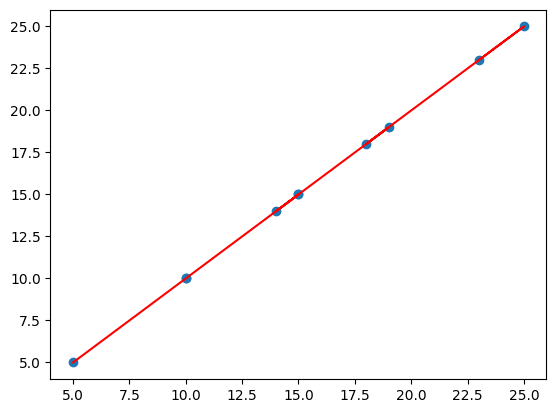

In [4]:
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

x = df.values[:, -1].reshape(-1, 1)

y = df.values[:, -1].reshape(-1, 1)

fit = LinearRegression().fit(x, y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f"m = {m}, b = {b}")

plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.show()

## How it actually works

The basic explaination of how linear regression works is that it tries to find the best fit line for the given data points. The best fit line is the one which has the least error. The error is calculated by the difference between the actual value and the predicted value. The predicted value is calculated by the equation of the line.

These values are called residuals. The sum of the squares of the residuals is called the sum of squared errors (SSE). The line with the least SSE is the best fit line.

In [6]:
# Calculating the residuals

import pandas as pd

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

residuals = []

# Test line
# y = 1.832x + 0.5
m = 1.832
b = 0.5

for point in df:
    actual = point.y
    predicted = m*point.x + b
    residuals.append(round(actual - predicted, 2))

print(residuals)

[2.67, 5.84, 4.0, 7.17, 4.34, 3.51, 5.68, 2.84, 8.01, 4.18]


We calculate the squares of the residuals because the residuals can be positive or negative and if we don't square them, the positive and negative values will cancel each other out.

Positive and negative values also don't do well with calculus.

In [1]:
# Calculating the sum of squared residuals

import pandas as pd
import math

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

residuals = []

m = 1.832
b = 4.7

for point in df:
    actual = point.y
    predicted = m*point.x + b
    residuals.append(round(math.pow(actual - predicted, 2), 2))

print(residuals)

[2.35, 2.68, 0.04, 8.83, 0.02, 0.48, 2.18, 1.84, 14.53, 0.0]


## Gradient Descent

Gradient descent is an optimization algorithm which is used to find the minimum of a function. In our case, the function is the SSE. The minimum of the SSE is the best fit line.

Testing out the gradient descent for

$$
y = (x-3)^2 + 4
$$

In [2]:
import random
def f(x):
    return (x - 3) ** 2 + 4
def dx_f(x):
    return 2*(x - 3)
# The learning rate
L = 0.001
# The number of iterations to perform gradient descent
iterations = 100_000
# start at a random x
x = random.randint(-15, 15)
for i in range(iterations):
    # get slope
    d_x = dx_f(x)
    # update x by subtracting the (learning rate) * (slope)
    x -= L * d_x
print(x, f(x))  # prints 2.999999999999889 4.0


3.000000000000111 4.0


Fine tuning this by introducing 
$m$ and 
$b$

To calculate, we first derivate the MSE:

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

Now, derivating this with respect to $m$ and $b$:

$$
\frac{\partial MSE}{\partial m} = \frac{2}{n}\sum_{i=1}^{n}-x_i(y_i - \hat{y_i})

\frac{\partial MSE}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}-(y_i - \hat{y_i})
$$

Hence, we substitute the values of $m$ and $b$ as 

$$
\frac{1}{n} * \sum_{i=1}^{n}2x_i(y_i - \hat{y_i})
$$

In [5]:
import pandas as pd
# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
# Building the model
m = 0.0
b = 0.0
# The learning Rate
L = .001
# The number of iterations
iterations = 100_000
n = float(len(points))  # Number of elements in X
# Perform Gradient Descent
for i in range(iterations):
    # slope with respect to m
    D_m = sum(1/n* 2 * p.x * ((m * p.x + b) - p.y) for p in points)
    # slope with respect to b
    D_b = sum(1/n * 2 * ((m * p.x + b) - p.y) for p in points)
    # update m and b
    m -= L * D_m
    b -= L * D_b
print("y = {0}x + {1}".format(m, b))


y = 1.9393939393940933x + 4.733333333332265


## Stochastic Gradient Descent

Stochastic gradient descent is a variation of gradient descent that uses an iterative method to find the minimum and use a smaller batch of data to calculate the gradient. This is done to reduce the computational cost of gradient descent.

In [14]:
#!TODO: Learn how to do this
#! I Have No Idea what the hell is going on here

import pandas as pd
import numpy as np
# Input data
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
n = data.shape[0]  # rows
# Building the model
m = 0.0
b = 0.0
sample_size = 1  # sample size
L = .0001  # The learning Rate
epochs = 1_000_000  # The number of iterations to perform gradient descent
# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]
    # The current predicted value of Y
    Y_pred = m * x_sample + b
    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))
    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update b
    
    # print progress
    # if i % 10000 == 0:
        # print(i, m, b)
print("y = {0}x + {1}".format(m, b))

y = 1.9420423045453836x + 4.729345887887508
